 import libraries 

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

importing and loading dataset

banks provide loans. They have presence across all urban, semi urban and rural areas. Customer first apply for  loan after that bank validates the customer eligibility for loan. bank  wants to automate the loan eligibility process based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.
loanid                  unique id 
Gender                  Male/ Female
Married	                married (Y/N)
Dependents	            Number of dependents
Education	            Education (Graduate/ Under Graduate)
Self_Employed	        Self employed (Y/N)
ApplicantIncome	        Applicant income
CoapplicantIncome       Coapplicant income
LoanAmount	            Loan amount in thousands
Loan_Amount_Term        Term of loan in months
Credit_History	        credit history meets guidelines
Property_Area	        Urban/ Semi Urban/ Rural    
Loan_Status	            Loan approved (Y/N)         is the output parameter


In [121]:
df = pd.read_csv('loan_data_set.csv')
df.head(100)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
96,LP001327,Female,Yes,0,Graduate,No,2484,2302.0,137.0,360.0,1.0,Semiurban,Y
97,LP001333,Male,Yes,0,Graduate,No,1977,997.0,50.0,360.0,1.0,Semiurban,Y
98,LP001334,Male,Yes,0,Not Graduate,No,4188,0.0,115.0,180.0,1.0,Semiurban,Y


dataset  shape

In [122]:
df.shape

(614, 13)

data information

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


DATA CLEANING

checking the missing values

In [124]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

we will fill the missing values of the loan amount and credit history by taking the mean of the variables

In [125]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [126]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

again checking the still missing values

In [127]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

drop all the  remaining missing values

In [128]:
df.dropna(inplace=True)

confirm that there are no missing values

In [129]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

check final shape of dataset

In [130]:
df.shape

(542, 13)

EXPLORATORY DATA ANALYSIS

comparsion between the parameters in getting the loan

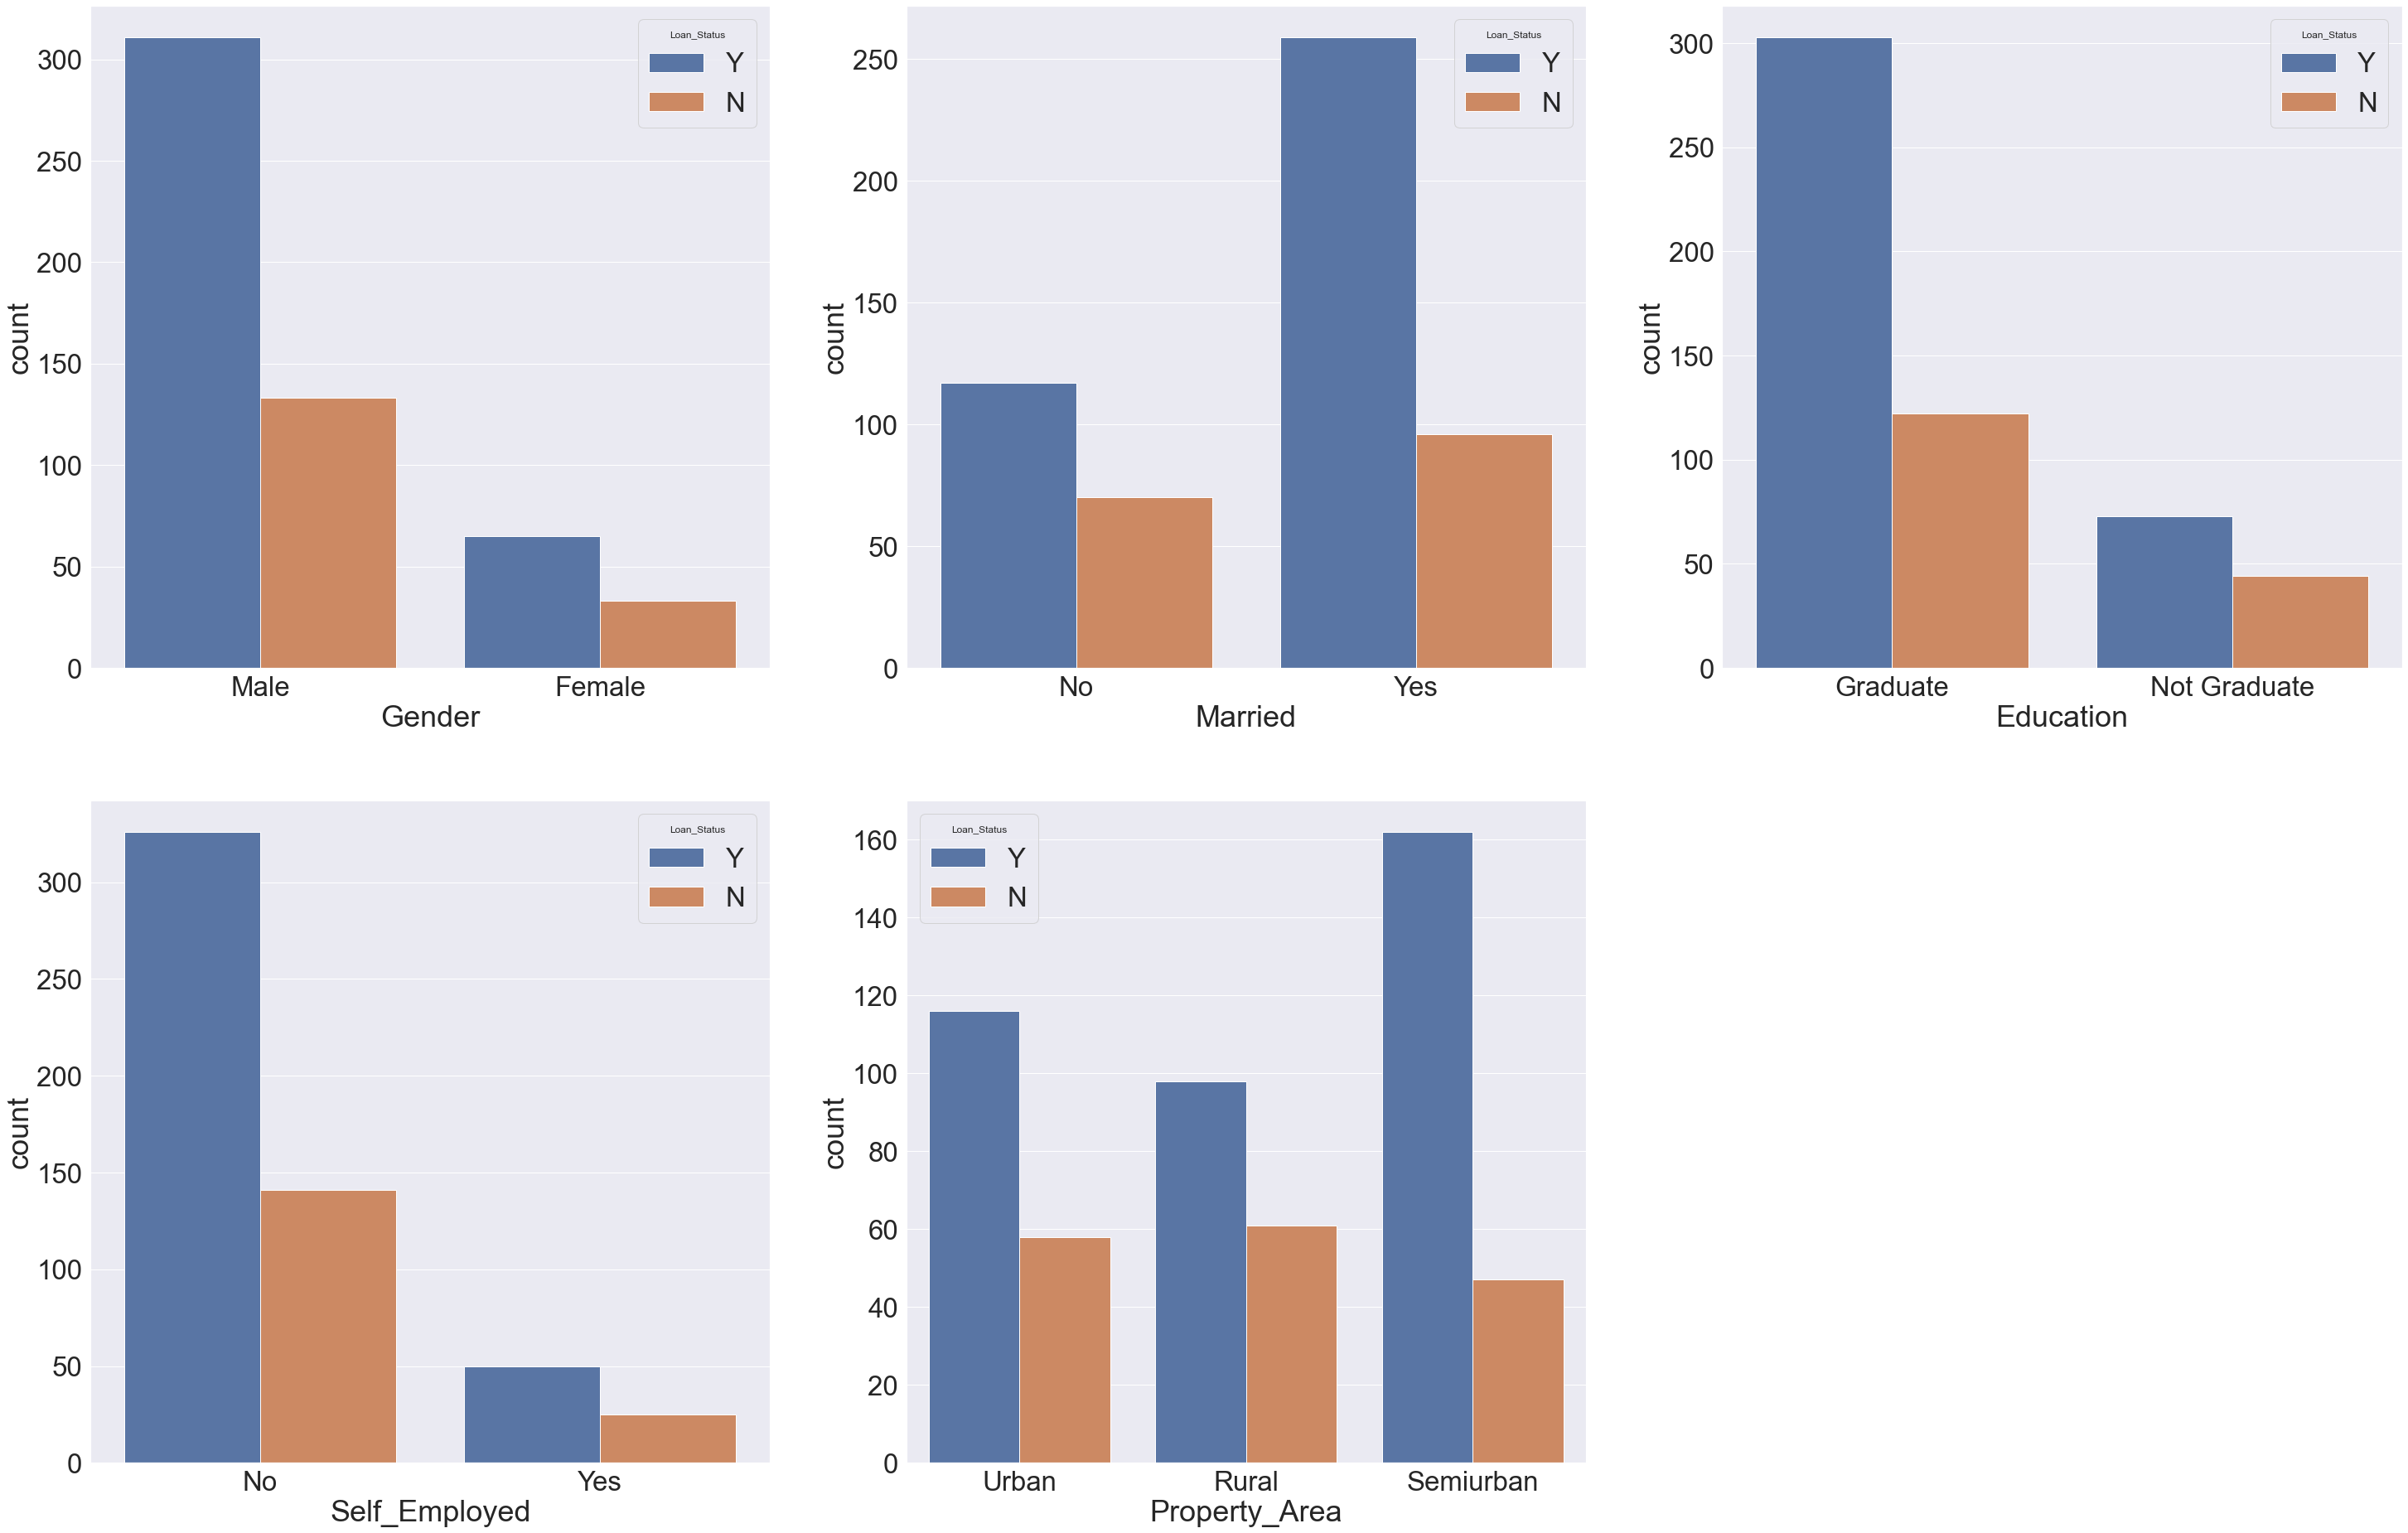

In [131]:
plt.figure(figsize=(50,50))
sns.set(font_scale = 3)
plt.subplot(331)
sns.countplot(df['Gender'],hue=df['Loan_Status'])

plt.subplot(332)
sns.countplot(df['Married'],hue=df['Loan_Status'])

plt.subplot(333)
sns.countplot(df['Education'],hue=df['Loan_Status'])

plt.subplot(334)
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])

plt.subplot(335)
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])
           

replacing the variable values to numerical form and displaying  the value count

In [132]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)

In [133]:
df['Loan_Status'].value_counts()

1    376
0    166
Name: Loan_Status, dtype: int64

In [134]:
df.Gender = df.Gender.map({'Male':1,'Female':0})
df['Gender'].value_counts()

1    444
0     98
Name: Gender, dtype: int64

In [135]:
df['Married'].replace('Yes',1,inplace=True)
df['Married'].replace('No',0,inplace=True)
df['Married'].value_counts()

1    355
0    187
Name: Married, dtype: int64

In [136]:
df.Dependents = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()

0    309
2     94
1     94
3     45
Name: Dependents, dtype: int64

In [137]:
df.Education = df.Education.map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()

1    425
0    117
Name: Education, dtype: int64

In [138]:
df.Self_Employed = df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

0    467
1     75
Name: Self_Employed, dtype: int64

In [139]:
df.Property_Area = df.Property_Area.map({'Urban':1,'Rural':0,'Semiurban':2})
df['Property_Area'].value_counts()

2    209
1    174
0    159
Name: Property_Area, dtype: int64

In [140]:
df['LoanAmount'].value_counts()

146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
53.000000      1
65.000000      1
109.000000     1
156.000000     1
89.000000      1
Name: LoanAmount, Length: 195, dtype: int64

In [141]:
df['Loan_Amount_Term'].value_counts()

360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
240.0      3
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [142]:
df['Credit_History'].value_counts()

1.000000    425
0.000000     74
0.842199     43
Name: Credit_History, dtype: int64

final dataframe

In [143]:
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.000000,1,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.000000,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.000000,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.000000,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.000000,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.000000,360.0,1.000000,1,1
6,LP001013,1,1,0,0,0,2333,1516.0,95.000000,360.0,1.000000,1,1
7,LP001014,1,1,3,1,0,3036,2504.0,158.000000,360.0,0.000000,2,0
8,LP001018,1,1,2,1,0,4006,1526.0,168.000000,360.0,1.000000,1,1
9,LP001020,1,1,1,1,0,12841,10968.0,349.000000,360.0,1.000000,2,0


importing packages for classification algorithms

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

spliting the dataset into test and train

In [145]:
x=df.iloc[1:542,1:12].values
y=df.iloc[1:542,12].values


In [146]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


logisitic regression

logistic regression is supervised learning  classification algorithm used to predict the probability of the target variable.
Mathematically ,a logistics regression model predicts p(y=1) as a function of x 

sigmoid function

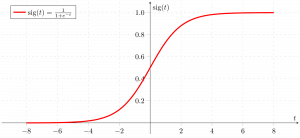

check the accuracy of the logistic regression algorithm

In [147]:
model = LogisticRegression()
model.fit(x_train,y_train)
lr_prediction = model.predict(x_test)
print('Logistic Regression accuracy=',metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression accuracy= 0.7914110429447853


print the predicted values

In [148]:
print(lr_prediction)
print(y_test)

[1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0]
[0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0
 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0]


confusion matrix

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

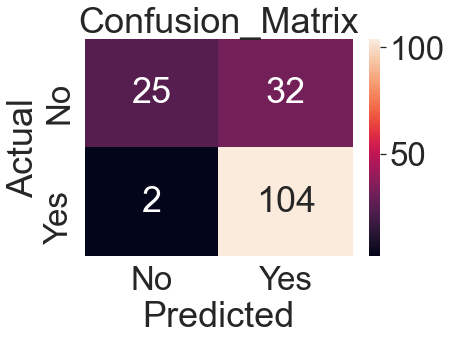

In [149]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lr_prediction)
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax, fmt='g');

ax.set_xlabel('Predicted');ax.set_ylabel('Actual');
ax.set_title('Confusion_Matrix');
ax.xaxis.set_ticklabels(['No','Yes']); 
ax.yaxis.set_ticklabels(['No','Yes']);
                                    

import packages 

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

spliting the dataset into test and train

In [151]:
x=df.iloc[1:542,1:12].values
y=df.iloc[1:542,12].values

In [152]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

desicion tree

Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

checking the accuracy using desicion tree

In [153]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

dc_prediction = model.predict(x_test)
print('Decision Tree accuracy = ',metrics.accuracy_score(dc_prediction,y_test))

Decision Tree accuracy =  0.7300613496932515


import packages

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

split the dataset to train and test

In [155]:
x=df.iloc[1:542,1:12].values
y=df.iloc[1:542,12].values

In [156]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

random forest classifier

The random forest is a model made up of many decision trees

check the accuracy using random forest classifier

In [157]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
rf_prediction = model.predict(x_test)
print('Random Forest accuracy=',metrics.accuracy_score(rf_prediction,y_test))

Random Forest accuracy= 0.754601226993865


predicted results

In [186]:
pred_test = model.predict(x_test)
pred_test[:50]

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0], dtype=int64)

creating a csv file which includes loanid and loan status

In [187]:
submission = pd.read_csv("submissions.csv")

In [188]:
test = pd.read_csv("test.csv")
test_original = test.copy()

In [189]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [190]:
submission['Loan_Status'].replace(1,'Y',inplace=True)
submission['Loan_Status'].replace(0,'N',inplace=True)

displaying the predicted results

In [185]:
submission.head(50)

,Loan_ID,Loan_Status
0,LP001002,Y
1,LP001003,N
2,LP001005,N
3,LP001006,Y
4,LP001008,Y
5,LP001011,N
6,LP001013,N
7,LP001014,Y
8,LP001018,Y
9,LP001020,Y


conclusion

Out of the three algorithms we have used to train the data set we have noticed that logistic regression has given the best accuracy percentage compared to random forest and decision tree.